In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import  seaborn as sns
import pprint
%matplotlib inline

In [523]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [524]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [525]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [526]:
df= pd.read_csv('drive/My Drive/DATA/Homepage.csv')

In [527]:
print(df)

                 FName  Dtype  Fstatus     MeterID       SDate     sTime  \
0         11KV AAMAMAI      2        1  SPX0975918  2022-05-31  23:30:18   
1      11KV LEELAKHEDI      2        1  SPX0975550  2022-05-31  23:30:16   
2        11KV ABIDABAD      2        1  SPX0976218  2022-05-31  23:30:14   
3             33KV I/C      2        1  SPX0976216  2022-05-31  23:30:12   
4         11KV AAMAMAI      2        1  SPX0975918  2022-05-31  23:00:18   
...                ...    ...      ...         ...         ...       ...   
17045         33KV I/C      2        1  SPX0976216  2022-04-01   0:30:12   
17046     11KV AAMAMAI      2        1  SPX0975918  2022-04-01   0:00:18   
17047  11KV LEELAKHEDI      2        1  SPX0975550  2022-04-01   0:00:16   
17048    11KV ABIDABAD      2        1  SPX0976218  2022-04-01   0:00:14   
17049         33KV I/C      2        1  SPX0976216  2022-04-01   0:00:12   

             Date      Time   RVol   YVol   BVol   Ramp   Yamp  Bamp  \
0      2022-05-

In [528]:
df.head()

,FName,Dtype,Fstatus,MeterID,SDate,sTime,Date,Time,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR
0,11KV AAMAMAI,2,1,SPX0975918,2022-05-31,23:30:18,2022-05-31,23:28:22,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07
1,11KV LEELAKHEDI,2,1,SPX0975550,2022-05-31,23:30:16,2022-05-31,23:28:02,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01
2,11KV ABIDABAD,2,1,SPX0976218,2022-05-31,23:30:14,2022-05-31,23:28:31,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04
3,33KV I/C,2,1,SPX0976216,2022-05-31,23:30:12,2022-05-31,23:27:11,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19
4,11KV AAMAMAI,2,1,SPX0975918,2022-05-31,23:00:18,2022-05-31,22:58:22,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07


In [529]:
df.tail()

,FName,Dtype,Fstatus,MeterID,SDate,sTime,Date,Time,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR
17045,33KV I/C,2,1,SPX0976216,2022-04-01,0:30:12,2022-04-01,0:28:02,33.38,33.43,33.24,13.96,10.99,5.64,49.96,0.4957,0.54,0.21
17046,11KV AAMAMAI,2,1,SPX0975918,2022-04-01,0:00:18,2022-03-31,23:59:13,11.06,11.10,11.10,29.37,28.55,0.01,50.00,0.3014,0.31,0.08
17047,11KV LEELAKHEDI,2,1,SPX0975550,2022-04-01,0:00:16,2022-03-31,23:58:53,11.06,11.10,11.11,3.77,3.69,3.83,50.00,0.0645,0.07,0.03
17048,11KV ABIDABAD,2,1,SPX0976218,2022-04-01,0:00:14,2022-03-31,23:59:19,11.04,11.11,11.07,0.01,8.34,8.18,50.01,0.0831,0.09,0.03
17049,33KV I/C,2,1,SPX0976216,2022-04-01,0:00:12,2022-03-31,23:58:03,33.39,33.46,33.24,14.04,11.02,5.71,50.00,0.4995,0.54,0.21


In [530]:
df.shape

(17050, 18)

In [531]:
df.describe()

,Dtype,Fstatus,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR
count,17050.0,17050.0,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000,17050.000000
mean,2.0,1.0,17.666223,17.703991,17.633629,12.290201,13.803983,9.506087,49.971877,0.302695,0.341163,0.144870
std,0.0,0.0,10.220338,10.210820,10.139540,11.105428,9.185957,6.277078,0.082984,0.258965,0.277629,0.116011
min,2.0,1.0,10.010000,10.000000,10.090000,0.000000,0.000000,0.000000,49.520000,0.000000,0.000000,0.000000
25%,2.0,1.0,11.100000,11.140000,11.120000,4.170000,8.100000,5.180000,49.940000,0.097200,0.110000,0.040000
50%,2.0,1.0,11.210000,11.250000,11.220000,9.835000,11.385000,9.030000,50.000000,0.193850,0.230000,0.110000
75%,2.0,1.0,33.230000,33.250000,33.080000,17.120000,16.190000,12.907500,50.020000,0.477900,0.540000,0.220000
max,2.0,1.0,35.060000,35.040000,34.850000,56.520000,55.670000,46.360000,50.310000,1.518600,1.680000,0.970000


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17050 entries, 0 to 17049
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FName      17050 non-null  object 
 1   Dtype      17050 non-null  int64  
 2   Fstatus    17050 non-null  int64  
 3   MeterID    17050 non-null  object 
 4   SDate      17050 non-null  object 
 5   sTime      17050 non-null  object 
 6   Date       17050 non-null  object 
 7   Time       17050 non-null  object 
 8   RVol       17050 non-null  float64
 9   YVol       17050 non-null  float64
 10  BVol       17050 non-null  float64
 11  Ramp       17050 non-null  float64
 12  Yamp       17050 non-null  float64
 13  Bamp       17050 non-null  float64
 14  Frequency  17050 non-null  float64
 15  MW         17050 non-null  float64
 16  MVA        17050 non-null  float64
 17  MVAR       17050 non-null  float64
dtypes: float64(10), int64(2), object(6)
memory usage: 2.3+ MB


In [533]:
df.isnull().count

<bound method DataFrame.count of        FName  Dtype  Fstatus  MeterID  SDate  sTime   Date   Time   RVol  \
0      False  False    False    False  False  False  False  False  False   
1      False  False    False    False  False  False  False  False  False   
2      False  False    False    False  False  False  False  False  False   
3      False  False    False    False  False  False  False  False  False   
4      False  False    False    False  False  False  False  False  False   
...      ...    ...      ...      ...    ...    ...    ...    ...    ...   
17045  False  False    False    False  False  False  False  False  False   
17046  False  False    False    False  False  False  False  False  False   
17047  False  False    False    False  False  False  False  False  False   
17048  False  False    False    False  False  False  False  False  False   
17049  False  False    False    False  False  False  False  False  False   

        YVol   BVol   Ramp   Yamp   Bamp  Frequency   

In [534]:
print(df.SDate.unique(),"\n")
print("Total Number of Unique SDate", df.SDate.nunique(), "\n")

['2022-05-31' '2022-03-31' '2022-05-30' '2022-03-30' '2022-06-30'
 '2022-04-30' '2022-05-29' '2022-03-29' '2022-06-29' '2022-04-29'
 '2022-05-28' '2022-03-28' '2022-06-28' '2022-04-28' '2022-05-27'
 '2022-03-27' '2022-06-27' '2022-04-27' '2022-05-26' '2022-03-26'
 '2022-06-26' '2022-04-26' '2022-05-25' '2022-03-25' '2022-06-25'
 '2022-04-25' '2022-05-24' '2022-03-24' '2022-06-24' '2022-04-24'
 '2022-05-23' '2022-03-23' '2022-06-23' '2022-04-23' '2022-05-22'
 '2022-03-22' '2022-06-22' '2022-04-22' '2022-05-21' '2022-03-21'
 '2022-06-21' '2022-07-21' '2022-04-21' '2022-05-20' '2022-03-20'
 '2022-06-20' '2022-07-20' '2022-04-20' '2022-05-19' '2022-03-19'
 '2022-06-19' '2022-07-19' '2022-04-19' '2022-05-18' '2022-03-18'
 '2022-06-18' '2022-07-18' '2022-04-18' '2022-05-17' '2022-03-17'
 '2022-06-17' '2022-07-17' '2022-04-17' '2022-05-16' '2022-03-16'
 '2022-06-16' '2022-07-16' '2022-04-16' '2022-05-15' '2022-03-15'
 '2022-06-15' '2022-07-15' '2022-04-15' '2022-05-14' '2022-03-14'
 '2022-06-

In [535]:
print(df.sTime.unique(),"\n")
print("Total Number of Unique sTime", df.sTime.nunique(), "\n")

['23:30:18' '23:30:16' '23:30:14' ... '1:00:48' '1:00:46' '1:00:44'] 

Total Number of Unique sTime 1019 



In [536]:
print(df.Date.unique(),"\n")
print("Total Number of Unique Date", df.Date.nunique(), "\n")

['2022-05-31' '2022-05-30' '2022-03-31' '2022-03-30' '2022-05-29'
 '2022-03-29' '2022-06-30' '2022-04-30' '2022-04-29' '2022-05-28'
 '2022-03-28' '2022-06-29' '2022-04-28' '2022-03-27' '2022-06-28'
 '2022-06-27' '2022-04-27' '2022-05-27' '2022-05-26' '2022-03-26'
 '2022-06-26' '2022-03-25' '2022-06-25' '2022-04-26' '2022-04-25'
 '2022-05-25' '2022-05-24' '2022-03-24' '2022-04-24' '2022-05-23'
 '2022-03-23' '2022-06-24' '2022-06-23' '2022-04-23' '2022-05-22'
 '2022-03-22' '2022-06-22' '2022-04-22' '2022-05-21' '2022-03-21'
 '2022-06-21' '2022-04-21' '2022-05-20' '2022-06-20' '2022-07-21'
 '2022-07-20' '2022-04-20' '2022-03-20' '2022-03-19' '2022-06-19'
 '2022-07-19' '2022-04-19' '2022-05-19' '2022-05-18' '2022-03-18'
 '2022-04-18' '2022-05-17' '2022-06-18' '2022-06-17' '2022-07-18'
 '2022-07-17' '2022-04-17' '2022-05-16' '2022-03-17' '2022-03-16'
 '2022-07-16' '2022-04-16' '2022-03-15' '2022-06-16' '2022-04-15'
 '2022-05-15' '2022-05-14' '2022-03-14' '2022-06-15' '2022-06-14'
 '2022-07-

In [537]:
print(df.Time.unique(),"\n")
print("Total Number of Unique Time", df.Time.nunique(), "\n")

['23:28:22' '23:28:02' '23:28:31' ... '2:28:52' '1:58:53' '0:29:19'] 

Total Number of Unique Time 7806 



In [538]:
print(df.FName.unique(),"\n")
print("Total Number of Unique FName", df.FName.nunique(), "\n")

['11KV AAMAMAI' '11KV LEELAKHEDI' '11KV ABIDABAD' '33KV I/C'] 

Total Number of Unique FName 4 



In [539]:
df=df.drop(['FName','MeterID','SDate','sTime','Dtype','Fstatus',], axis = 1)

In [540]:
df['date_time'] = df['Date'].str.cat(df['Time'], sep= ' ')
df.drop(['Date', 'Time'], inplace= True, axis = 1)
df.head()


,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,date_time
0,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07,2022-05-31 23:28:22
1,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01,2022-05-31 23:28:02
2,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04,2022-05-31 23:28:31
3,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19,2022-05-31 23:27:11
4,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07,2022-05-31 22:58:22


In [541]:
df

,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,date_time
0,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07,2022-05-31 23:28:22
1,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01,2022-05-31 23:28:02
2,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04,2022-05-31 23:28:31
3,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19,2022-05-31 23:27:11
4,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07,2022-05-31 22:58:22
...,...,...,...,...,...,...,...,...,...,...,...
17045,33.38,33.43,33.24,13.96,10.99,5.64,49.96,0.4957,0.54,0.21,2022-04-01 0:28:02
17046,11.06,11.10,11.10,29.37,28.55,0.01,50.00,0.3014,0.31,0.08,2022-03-31 23:59:13
17047,11.06,11.10,11.11,3.77,3.69,3.83,50.00,0.0645,0.07,0.03,2022-03-31 23:58:53
17048,11.04,11.11,11.07,0.01,8.34,8.18,50.01,0.0831,0.09,0.03,2022-03-31 23:59:19


In [542]:
dataset = df
dataset["Month"] = pd.to_datetime(df["date_time"]).dt.month
dataset["Year"] = pd.to_datetime(df["date_time"]).dt.year
dataset["Date"] = pd.to_datetime(df["date_time"]).dt.date
dataset["Time"] = pd.to_datetime(df["date_time"]).dt.time
dataset["Week"] = pd.to_datetime(df["date_time"]).dt.week
dataset["Day"] = pd.to_datetime(df["date_time"]).dt.day_name()
dataset = df.set_index("date_time")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)


<ipython-input-542-9f6657a99ced>:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,Month,Year,Date,Time,Week,Day
date_time,,,,,,,,,,,,,,,,
2022-05-31 23:28:22,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07,5,2022,2022-05-31,23:28:22,22,Tuesday
2022-05-31 23:28:02,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01,5,2022,2022-05-31,23:28:02,22,Tuesday
2022-05-31 23:28:31,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04,5,2022,2022-05-31,23:28:31,22,Tuesday
2022-05-31 23:27:11,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19,5,2022,2022-05-31,23:27:11,22,Tuesday
2022-05-31 22:58:22,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07,5,2022,2022-05-31,22:58:22,22,Tuesday
2022-05-31 22:58:03,11.07,11.10,11.10,3.66,3.88,4.29,49.98,0.0723,0.07,0.01,5,2022,2022-05-31,22:58:03,22,Tuesday
2022-05-31 22:58:32,11.07,11.13,11.10,0.01,9.30,9.13,49.99,0.0933,0.10,0.04,5,2022,2022-05-31,22:58:32,22,Tuesday
2022-05-31 22:57:12,33.39,33.44,33.24,11.75,10.36,5.16,49.98,0.4567,0.49,0.19,5,2022,2022-05-31,22:57:12,22,Tuesday
2022-05-31 22:28:25,11.12,11.15,11.14,23.56,22.73,0.01,49.93,0.2415,0.25,0.07,5,2022,2022-05-31,22:28:25,22,Tuesday


In [543]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2022] 

Total Number of Unique Year 1 



In [544]:
print(df.Month.unique(),"\n")
print("Total Number of Unique Month", df.Month.nunique(), "\n")

[5 3 6 4 7 2] 

Total Number of Unique Month 6 



In [545]:
print(df.Date.unique(),"\n")
print("Total Number of Unique Date", df.Date.nunique(), "\n")

[datetime.date(2022, 5, 31) datetime.date(2022, 5, 30)
 datetime.date(2022, 3, 31) datetime.date(2022, 3, 30)
 datetime.date(2022, 5, 29) datetime.date(2022, 3, 29)
 datetime.date(2022, 6, 30) datetime.date(2022, 4, 30)
 datetime.date(2022, 4, 29) datetime.date(2022, 5, 28)
 datetime.date(2022, 3, 28) datetime.date(2022, 6, 29)
 datetime.date(2022, 4, 28) datetime.date(2022, 3, 27)
 datetime.date(2022, 6, 28) datetime.date(2022, 6, 27)
 datetime.date(2022, 4, 27) datetime.date(2022, 5, 27)
 datetime.date(2022, 5, 26) datetime.date(2022, 3, 26)
 datetime.date(2022, 6, 26) datetime.date(2022, 3, 25)
 datetime.date(2022, 6, 25) datetime.date(2022, 4, 26)
 datetime.date(2022, 4, 25) datetime.date(2022, 5, 25)
 datetime.date(2022, 5, 24) datetime.date(2022, 3, 24)
 datetime.date(2022, 4, 24) datetime.date(2022, 5, 23)
 datetime.date(2022, 3, 23) datetime.date(2022, 6, 24)
 datetime.date(2022, 6, 23) datetime.date(2022, 4, 23)
 datetime.date(2022, 5, 22) datetime.date(2022, 3, 22)
 datetime.

Text(0.5, 1.0, 'Energy Consumption According to Month')

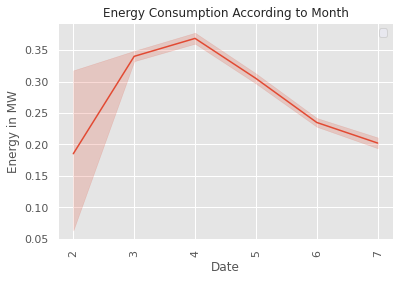

In [546]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionn in Year 2022")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Month")

<ipython-input-547-dbb00b99039a>:9: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-547-dbb00b99039a>:10: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



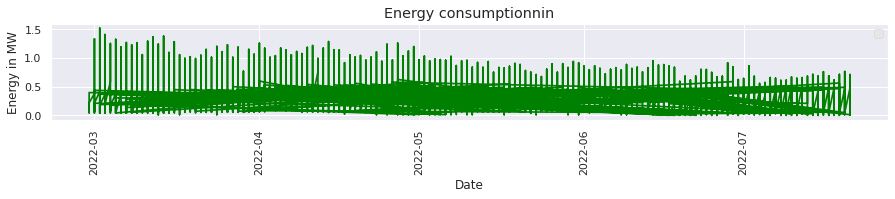

In [547]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
style.use('ggplot')

y_2022 = dataset["2022"]["MW"].to_list()
x_2022 = dataset["2022"]["Date"].to_list()
ax1.plot(x_2022,y_2022, color="green", linewidth=1.7)
plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Ennergy Distribution')

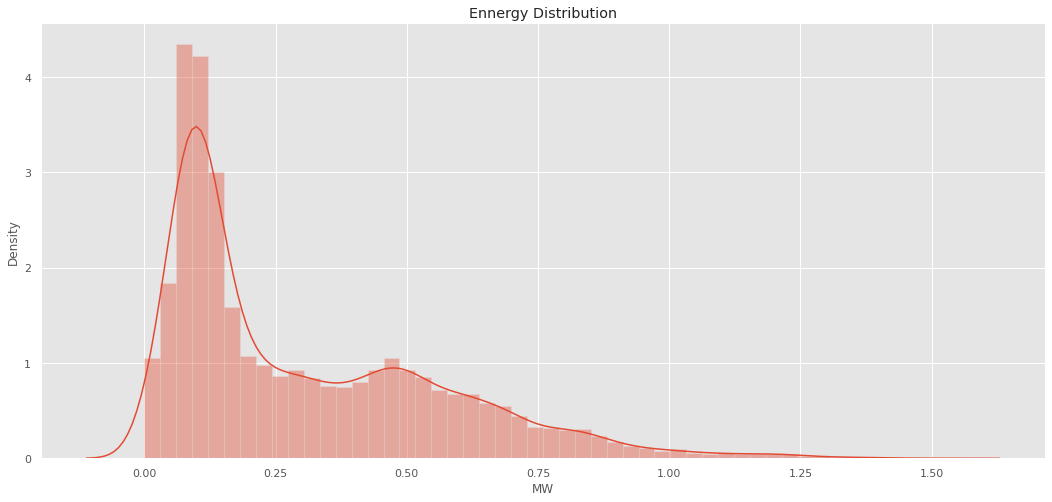

In [548]:
sns.distplot(dataset["MW"])
plt.title("Ennergy Distribution")

In [549]:
df.head()

,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,date_time,Month,Year,Date,Time,Week,Day
0,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07,2022-05-31 23:28:22,5,2022,2022-05-31,23:28:22,22,Tuesday
1,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01,2022-05-31 23:28:02,5,2022,2022-05-31,23:28:02,22,Tuesday
2,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04,2022-05-31 23:28:31,5,2022,2022-05-31,23:28:31,22,Tuesday
3,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19,2022-05-31 23:27:11,5,2022,2022-05-31,23:27:11,22,Tuesday
4,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07,2022-05-31 22:58:22,5,2022,2022-05-31,22:58:22,22,Tuesday


In [550]:
df

,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,date_time,Month,Year,Date,Time,Week,Day
0,11.06,11.11,11.09,22.74,21.91,0.01,49.98,0.2320,0.24,0.07,2022-05-31 23:28:22,5,2022,2022-05-31,23:28:22,22,Tuesday
1,11.06,11.11,11.10,3.55,3.80,4.22,49.98,0.0708,0.07,0.01,2022-05-31 23:28:02,5,2022,2022-05-31,23:28:02,22,Tuesday
2,11.07,11.13,11.10,0.01,8.73,8.57,49.98,0.0864,0.09,0.04,2022-05-31 23:28:31,5,2022,2022-05-31,23:28:31,22,Tuesday
3,33.38,33.44,33.22,11.56,10.04,4.97,49.98,0.4415,0.48,0.19,2022-05-31 23:27:11,5,2022,2022-05-31,23:27:11,22,Tuesday
4,11.07,11.10,11.10,23.01,22.18,0.01,49.98,0.2353,0.24,0.07,2022-05-31 22:58:22,5,2022,2022-05-31,22:58:22,22,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17045,33.38,33.43,33.24,13.96,10.99,5.64,49.96,0.4957,0.54,0.21,2022-04-01 0:28:02,4,2022,2022-04-01,00:28:02,13,Friday
17046,11.06,11.10,11.10,29.37,28.55,0.01,50.00,0.3014,0.31,0.08,2022-03-31 23:59:13,3,2022,2022-03-31,23:59:13,13,Thursday
17047,11.06,11.10,11.11,3.77,3.69,3.83,50.00,0.0645,0.07,0.03,2022-03-31 23:58:53,3,2022,2022-03-31,23:58:53,13,Thursday
17048,11.04,11.11,11.07,0.01,8.34,8.18,50.01,0.0831,0.09,0.03,2022-03-31 23:59:19,3,2022,2022-03-31,23:59:19,13,Thursday


In [551]:
df = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17050 entries, 0 to 17049
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RVol       17050 non-null  float64
 1   YVol       17050 non-null  float64
 2   BVol       17050 non-null  float64
 3   Ramp       17050 non-null  float64
 4   Yamp       17050 non-null  float64
 5   Bamp       17050 non-null  float64
 6   Frequency  17050 non-null  float64
 7   MW         17050 non-null  float64
 8   MVA        17050 non-null  float64
 9   MVAR       17050 non-null  float64
 10  date_time  17050 non-null  object 
 11  Month      17050 non-null  int64  
 12  Year       17050 non-null  int64  
 13  Date       17050 non-null  object 
 14  Time       17050 non-null  object 
 15  Week       17050 non-null  int64  
 16  Day        17050 non-null  object 
dtypes: float64(10), int64(3), object(4)
memory usage: 2.2+ MB


In [552]:
data = dataset.resample('D').mean()

In [553]:
data.head()

,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,Month,Year,Week
date_time,,,,,,,,,,,,,
2022-02-28,16.870000,16.877500,16.830000,8.562500,10.080000,3.910000,50.020000,0.185275,0.202500,0.082500,2.0,2022.0,9.0
2022-03-01,16.984211,17.003083,16.954436,15.312406,16.367368,11.356466,50.013759,0.368523,0.403459,0.149699,3.0,2022.0,9.0
2022-03-02,16.783698,16.800729,16.751510,16.230521,18.080313,12.307708,50.008385,0.388376,0.427865,0.166823,3.0,2022.0,9.0
2022-03-03,16.674556,16.689611,16.644833,15.826389,17.781389,11.500944,50.006111,0.374338,0.408056,0.152222,3.0,2022.0,9.0
2022-03-04,16.814510,16.832484,16.790392,16.501307,18.109216,11.688889,49.990327,0.390263,0.424248,0.152353,3.0,2022.0,9.0


In [554]:
data.tail()

,RVol,YVol,BVol,Ramp,Yamp,Bamp,Frequency,MW,MVA,MVAR,Month,Year,Week
date_time,,,,,,,,,,,,,
2022-07-17,18.799020,18.844510,18.747549,7.864412,10.631667,9.974118,49.995980,0.233890,0.290686,0.142647,7.0,2022.0,28.0
2022-07-18,17.324574,17.377209,17.301628,6.372016,9.954419,9.379690,49.930233,0.197320,0.247752,0.128760,7.0,2022.0,29.0
2022-07-19,17.009545,17.050530,16.980227,6.095455,9.782803,9.485758,49.983788,0.191173,0.238864,0.123788,7.0,2022.0,29.0
2022-07-20,20.371343,20.415373,20.309701,7.603284,11.383731,11.199851,49.998060,0.257716,0.325224,0.171791,7.0,2022.0,29.0
2022-07-21,19.312340,19.354681,19.252979,9.384255,11.043191,11.545106,50.021064,0.244266,0.304894,0.154043,7.0,2022.0,29.0


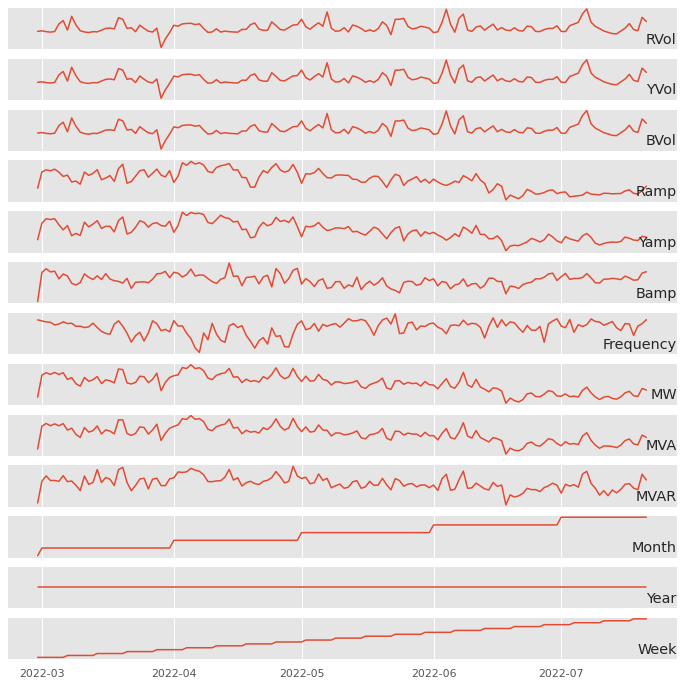

In [555]:
fig, ax = plt.subplots(figsize=(12,12))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [556]:
Month = ['03', '04', '05', '06']

In [557]:
data_train = data.loc[:'2022-04-20 ', :]['MW']
data_train.head()

date_time
2022-02-28    0.185275
2022-03-01    0.368523
2022-03-02    0.388376
2022-03-03    0.374338
2022-03-04    0.390263
Freq: D, Name: MW, dtype: float64

In [558]:
data_test = data.loc[:'2022-07-20', :]['MW']
data_test.head()

date_time
2022-02-28    0.185275
2022-03-01    0.368523
2022-03-02    0.388376
2022-03-03    0.374338
2022-03-04    0.390263
Freq: D, Name: MW, dtype: float64

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2022-02-28 to 2022-07-21
Freq: D
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RVol       144 non-null    float64
 1   YVol       144 non-null    float64
 2   BVol       144 non-null    float64
 3   Ramp       144 non-null    float64
 4   Yamp       144 non-null    float64
 5   Bamp       144 non-null    float64
 6   Frequency  144 non-null    float64
 7   MW         144 non-null    float64
 8   MVA        144 non-null    float64
 9   MVAR       144 non-null    float64
 10  Month      144 non-null    float64
 11  Year       144 non-null    float64
 12  Week       144 non-null    float64
dtypes: float64(13)
memory usage: 19.8 KB


In [560]:
data_train.shape

(52,)

In [561]:
data_test.shape

(143,)

In [562]:
data_train.head(14)

date_time
2022-02-28    0.185275
2022-03-01    0.368523
2022-03-02    0.388376
2022-03-03    0.374338
2022-03-04    0.390263
2022-03-05    0.373948
2022-03-06    0.388069
2022-03-07    0.332640
2022-03-08    0.347274
2022-03-09    0.296923
2022-03-10    0.276311
2022-03-11    0.348948
2022-03-12    0.317313
2022-03-13    0.329984
Freq: D, Name: MW, dtype: float64

In [563]:
data_train = np.array(data_train)

In [564]:
#we are splitting the data weekly wise(7days)

X_train, y_train = [], []

for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [565]:
#converting list to numpy array

X_train, y_train = np.array(X_train), np.array(y_train)

In [566]:
#shape of train and test dataset

X_train.shape, y_train.shape

((38, 7), (38, 7))

In [567]:
pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6
0,0.332640,0.347274,0.296923,0.276311,0.348948,0.317313,0.329984
1,0.347274,0.296923,0.276311,0.348948,0.317313,0.329984,0.356292
2,0.296923,0.276311,0.348948,0.317313,0.329984,0.356292,0.298240
3,0.276311,0.348948,0.317313,0.329984,0.356292,0.298240,0.329218
4,0.348948,0.317313,0.329984,0.356292,0.298240,0.329218,0.320964


In [568]:
#Normalising the dataset between 0 and 1

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [569]:
#Normalising the dataset

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [570]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6
0,0.000000,0.601354,0.693273,0.628279,0.702011,0.626472,0.691855
1,0.680344,0.693273,0.628279,0.702011,0.626472,0.691855,0.435210
2,0.754049,0.628279,0.702011,0.626472,0.691855,0.435210,0.502967
3,0.701934,0.702011,0.626472,0.691855,0.435210,0.502967,0.269835
4,0.761056,0.626472,0.691855,0.435210,0.502967,0.269835,0.174397


In [571]:
X_train = X_train.reshape(38, 7, 1)

In [572]:
X_train.shape

(38, 7, 1)

In [573]:
#building sequential model using Keras

reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))

In [574]:
#here we have considered loss as mean square error and optimizer as adam

reg.compile(loss='mse', optimizer='adam')

In [575]:
#training the model

reg.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 0.3275
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 0.3038
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2811
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2570
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2295
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1993
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1638
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1219
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0856
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0737
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0804
Epoch 12/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0745
Epoch 13/100
2/2 [==============================]

In [576]:
data_test = np.array(data_test)

In [577]:
#here we are splitting the data weekly wise(7days)

X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

In [578]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [579]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [580]:
#converting to 3 dimension

X_test = X_test.reshape(129,7,1)

In [581]:
X_test.shape

(129, 7, 1)

In [582]:
y_pred = reg.predict(X_test)

5/5 [==============================] - 1s 7ms/step


In [583]:
#bringing y_pred values to their original forms by using inverse transform

y_pred = y_scaler.inverse_transform(y_pred)

In [584]:
y_pred

array([[0.35135278, 0.3537046 , 0.35409075, 0.35876426, 0.3560255 ,
        0.35883608, 0.35855263],
       [0.35190406, 0.35409844, 0.35486373, 0.3599113 , 0.35505214,
        0.3574834 , 0.358416  ],
       [0.35075718, 0.35294643, 0.35399202, 0.35884336, 0.3542602 ,
        0.35662612, 0.3579109 ],
       [0.34653187, 0.34841758, 0.3510345 , 0.35485718, 0.35134062,
        0.352936  , 0.35548887],
       [0.34219643, 0.34387943, 0.34792268, 0.35076472, 0.34848416,
        0.34945545, 0.35322013],
       [0.34235224, 0.34418955, 0.34757894, 0.35039264, 0.34932116,
        0.35071823, 0.3535082 ],
       [0.34077927, 0.3425028 , 0.34647098, 0.34877697, 0.34866333,
        0.3498477 , 0.35266572],
       [0.34007475, 0.34178224, 0.3458438 , 0.34788316, 0.34868062,
        0.34990078, 0.35238534],
       [0.34176955, 0.34361142, 0.3469758 , 0.34936544, 0.3500497 ,
        0.3516376 , 0.35336006],
       [0.33975875, 0.3413894 , 0.34575784, 0.34765777, 0.3485509 ,
        0.34964094, 0.3

In [585]:
y_true = y_scaler.inverse_transform(y_test)

In [586]:
y_true

array([[0.33264   , 0.34727391, 0.296923  , 0.27631053, 0.34894813,
        0.31731333, 0.32998378],
       [0.34727391, 0.296923  , 0.27631053, 0.34894813, 0.31731333,
        0.32998378, 0.35629195],
       [0.296923  , 0.27631053, 0.34894813, 0.31731333, 0.32998378,
        0.35629195, 0.29824   ],
       [0.27631053, 0.34894813, 0.31731333, 0.32998378, 0.35629195,
        0.29824   , 0.32921835],
       [0.34894813, 0.31731333, 0.32998378, 0.35629195, 0.29824   ,
        0.32921835, 0.32096444],
       [0.31731333, 0.32998378, 0.35629195, 0.29824   , 0.32921835,
        0.32096444, 0.30361591],
       [0.32998378, 0.35629195, 0.29824   , 0.32921835, 0.32096444,
        0.30361591, 0.41919912],
       [0.35629195, 0.29824   , 0.32921835, 0.32096444, 0.30361591,
        0.41919912, 0.41423125],
       [0.29824   , 0.32921835, 0.32096444, 0.30361591, 0.41919912,
        0.41423125, 0.30387972],
       [0.32921835, 0.32096444, 0.30361591, 0.41919912, 0.41423125,
        0.30387972, 0.2

In [587]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [588]:
evaluate_model(y_true, y_pred)

(0.07830667133758529,
 [0.06863159565308029,
  0.07099720652217285,
  0.0776613156990254,
  0.07740297201547496,
  0.08225003998025246,
  0.08229720507697479,
  0.08724818108591947])

In [589]:
#standard deviation

np.std(y_true[0])

0.024719104829909834